In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("/content/sample_data/raw_analyst_ratings.csv")
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  
0 2020-06-05 10:30:54-04:00     A  
1 2020-06-03 10:45:20-04:00     A  
2 2020-05-26 04:30:07-04:00     

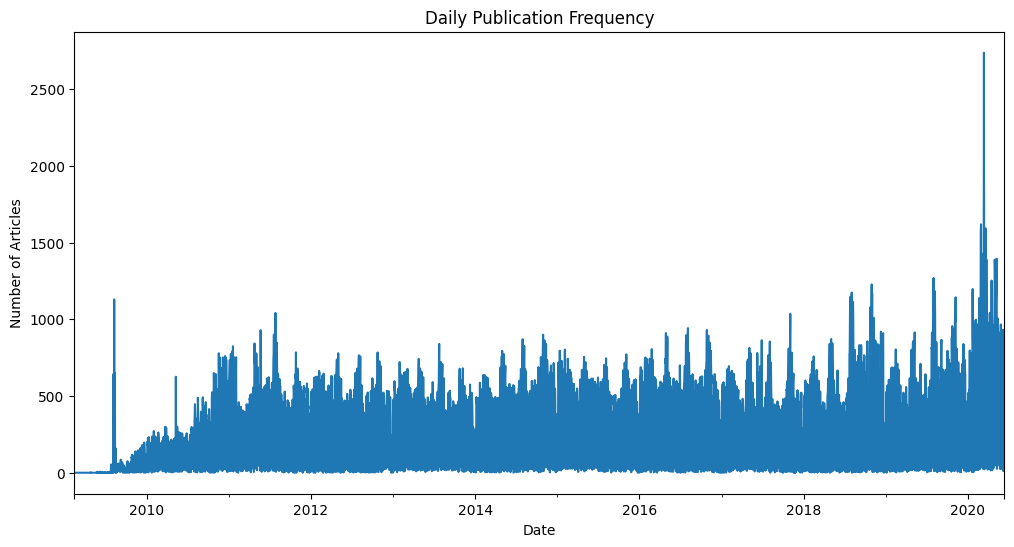

In [27]:
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data by day and count the number of articles each day
daily_frequency = df.resample('D').size()

# Plot the daily publication frequency
import matplotlib.pyplot as plt
daily_frequency.plot(figsize=(12, 6))
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

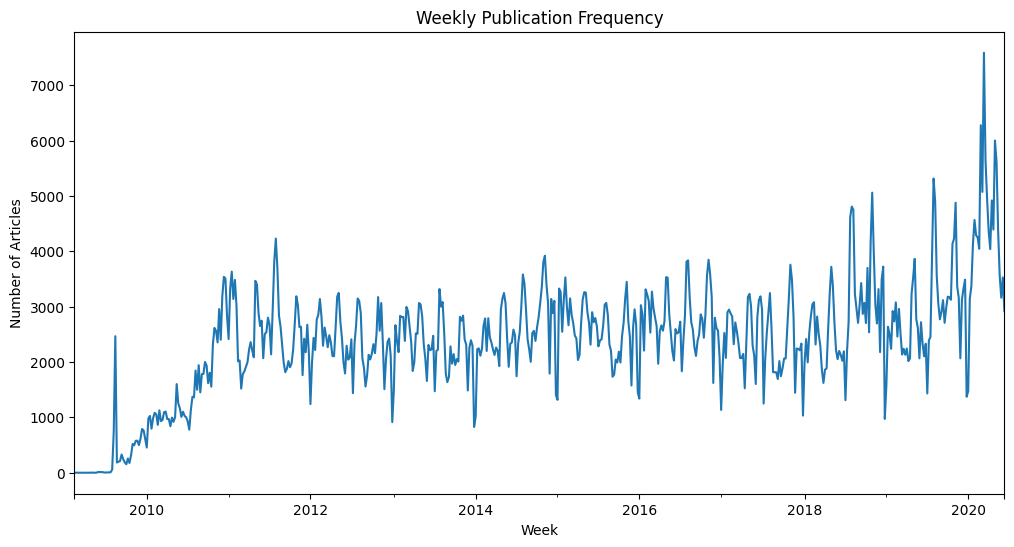

In [28]:
# Resample the data by week and count the number of articles each week
weekly_frequency = df.resample('W').size()

# Plot the weekly publication frequency
weekly_frequency.plot(figsize=(12, 6))
plt.title('Weekly Publication Frequency')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.show()



<ipython-input-30-72764428c6e1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = df.resample('M').size()


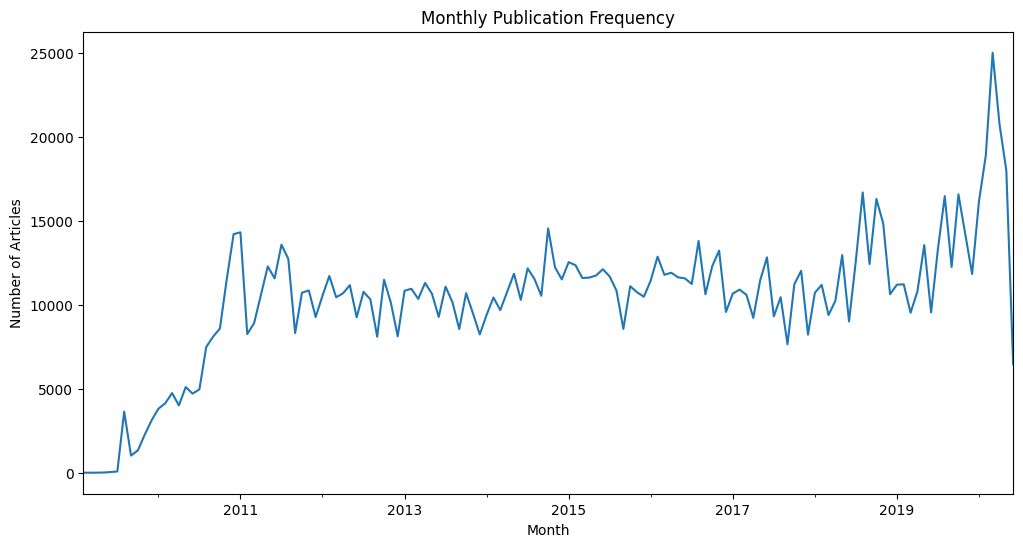

In [30]:
# Resample the data by month and count the number of articles each month
monthly_frequency = df.resample('M').size()

# Plot the monthly publication frequency
monthly_frequency.plot(figsize=(12, 6))
plt.title('Monthly Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show();



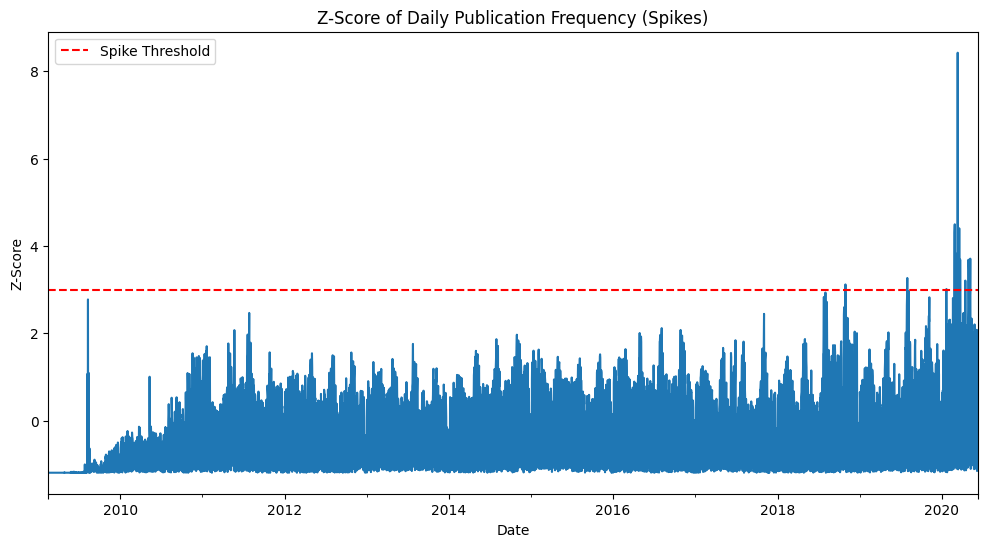

In [31]:
# Calculate a rolling mean (e.g., over 7 days)
rolling_mean = daily_frequency.rolling(window=7).mean()

# Calculate the z-score (standard score) to identify spikes
z_score = (daily_frequency - daily_frequency.mean()) / daily_frequency.std()

# Plot the Z-score to detect spikes
z_score.plot(figsize=(12, 6))
plt.title('Z-Score of Daily Publication Frequency (Spikes)')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.axhline(3, color='r', linestyle='--', label='Spike Threshold')
plt.legend()
plt.show()



In [32]:
# Find the dates where the z-score is greater than 3 (indicating a significant spike)
spike_dates = z_score[z_score > 3].index

# Show the dates with spikes
print(spike_dates)

DatetimeIndex(['2018-10-30 00:00:00-04:00', '2019-08-01 00:00:00-04:00',
               '2020-01-22 00:00:00-04:00', '2020-02-27 00:00:00-04:00',
               '2020-02-28 00:00:00-04:00', '2020-03-06 00:00:00-04:00',
               '2020-03-11 00:00:00-04:00', '2020-03-12 00:00:00-04:00',
               '2020-03-19 00:00:00-04:00', '2020-03-23 00:00:00-04:00',
               '2020-04-15 00:00:00-04:00', '2020-04-29 00:00:00-04:00',
               '2020-04-30 00:00:00-04:00', '2020-05-07 00:00:00-04:00'],
              dtype='datetime64[ns, UTC-04:00]', name='date', freq=None)


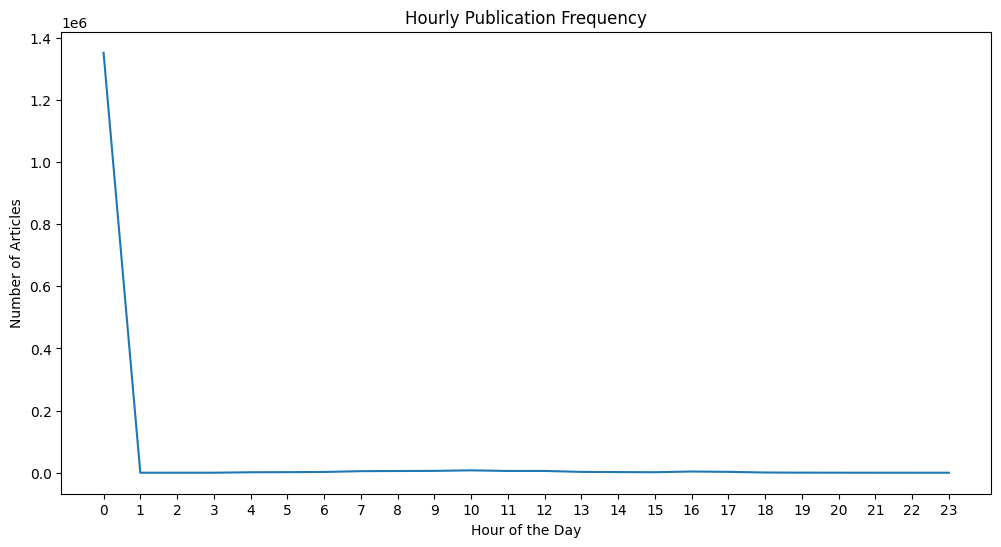

In [33]:
# Extract the time of publication
df['hour'] = df.index.hour

# Group by the hour of the day and count the number of articles published
hourly_publication = df.groupby('hour').size()

# Plot the hourly publication frequency
hourly_publication.plot(figsize=(12, 6))
plt.title('Hourly Publication Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(range(24))
plt.show()
